# Winning the Spam Battle: Optimizing Naive Bayes for Superior Email Filtering 🏆

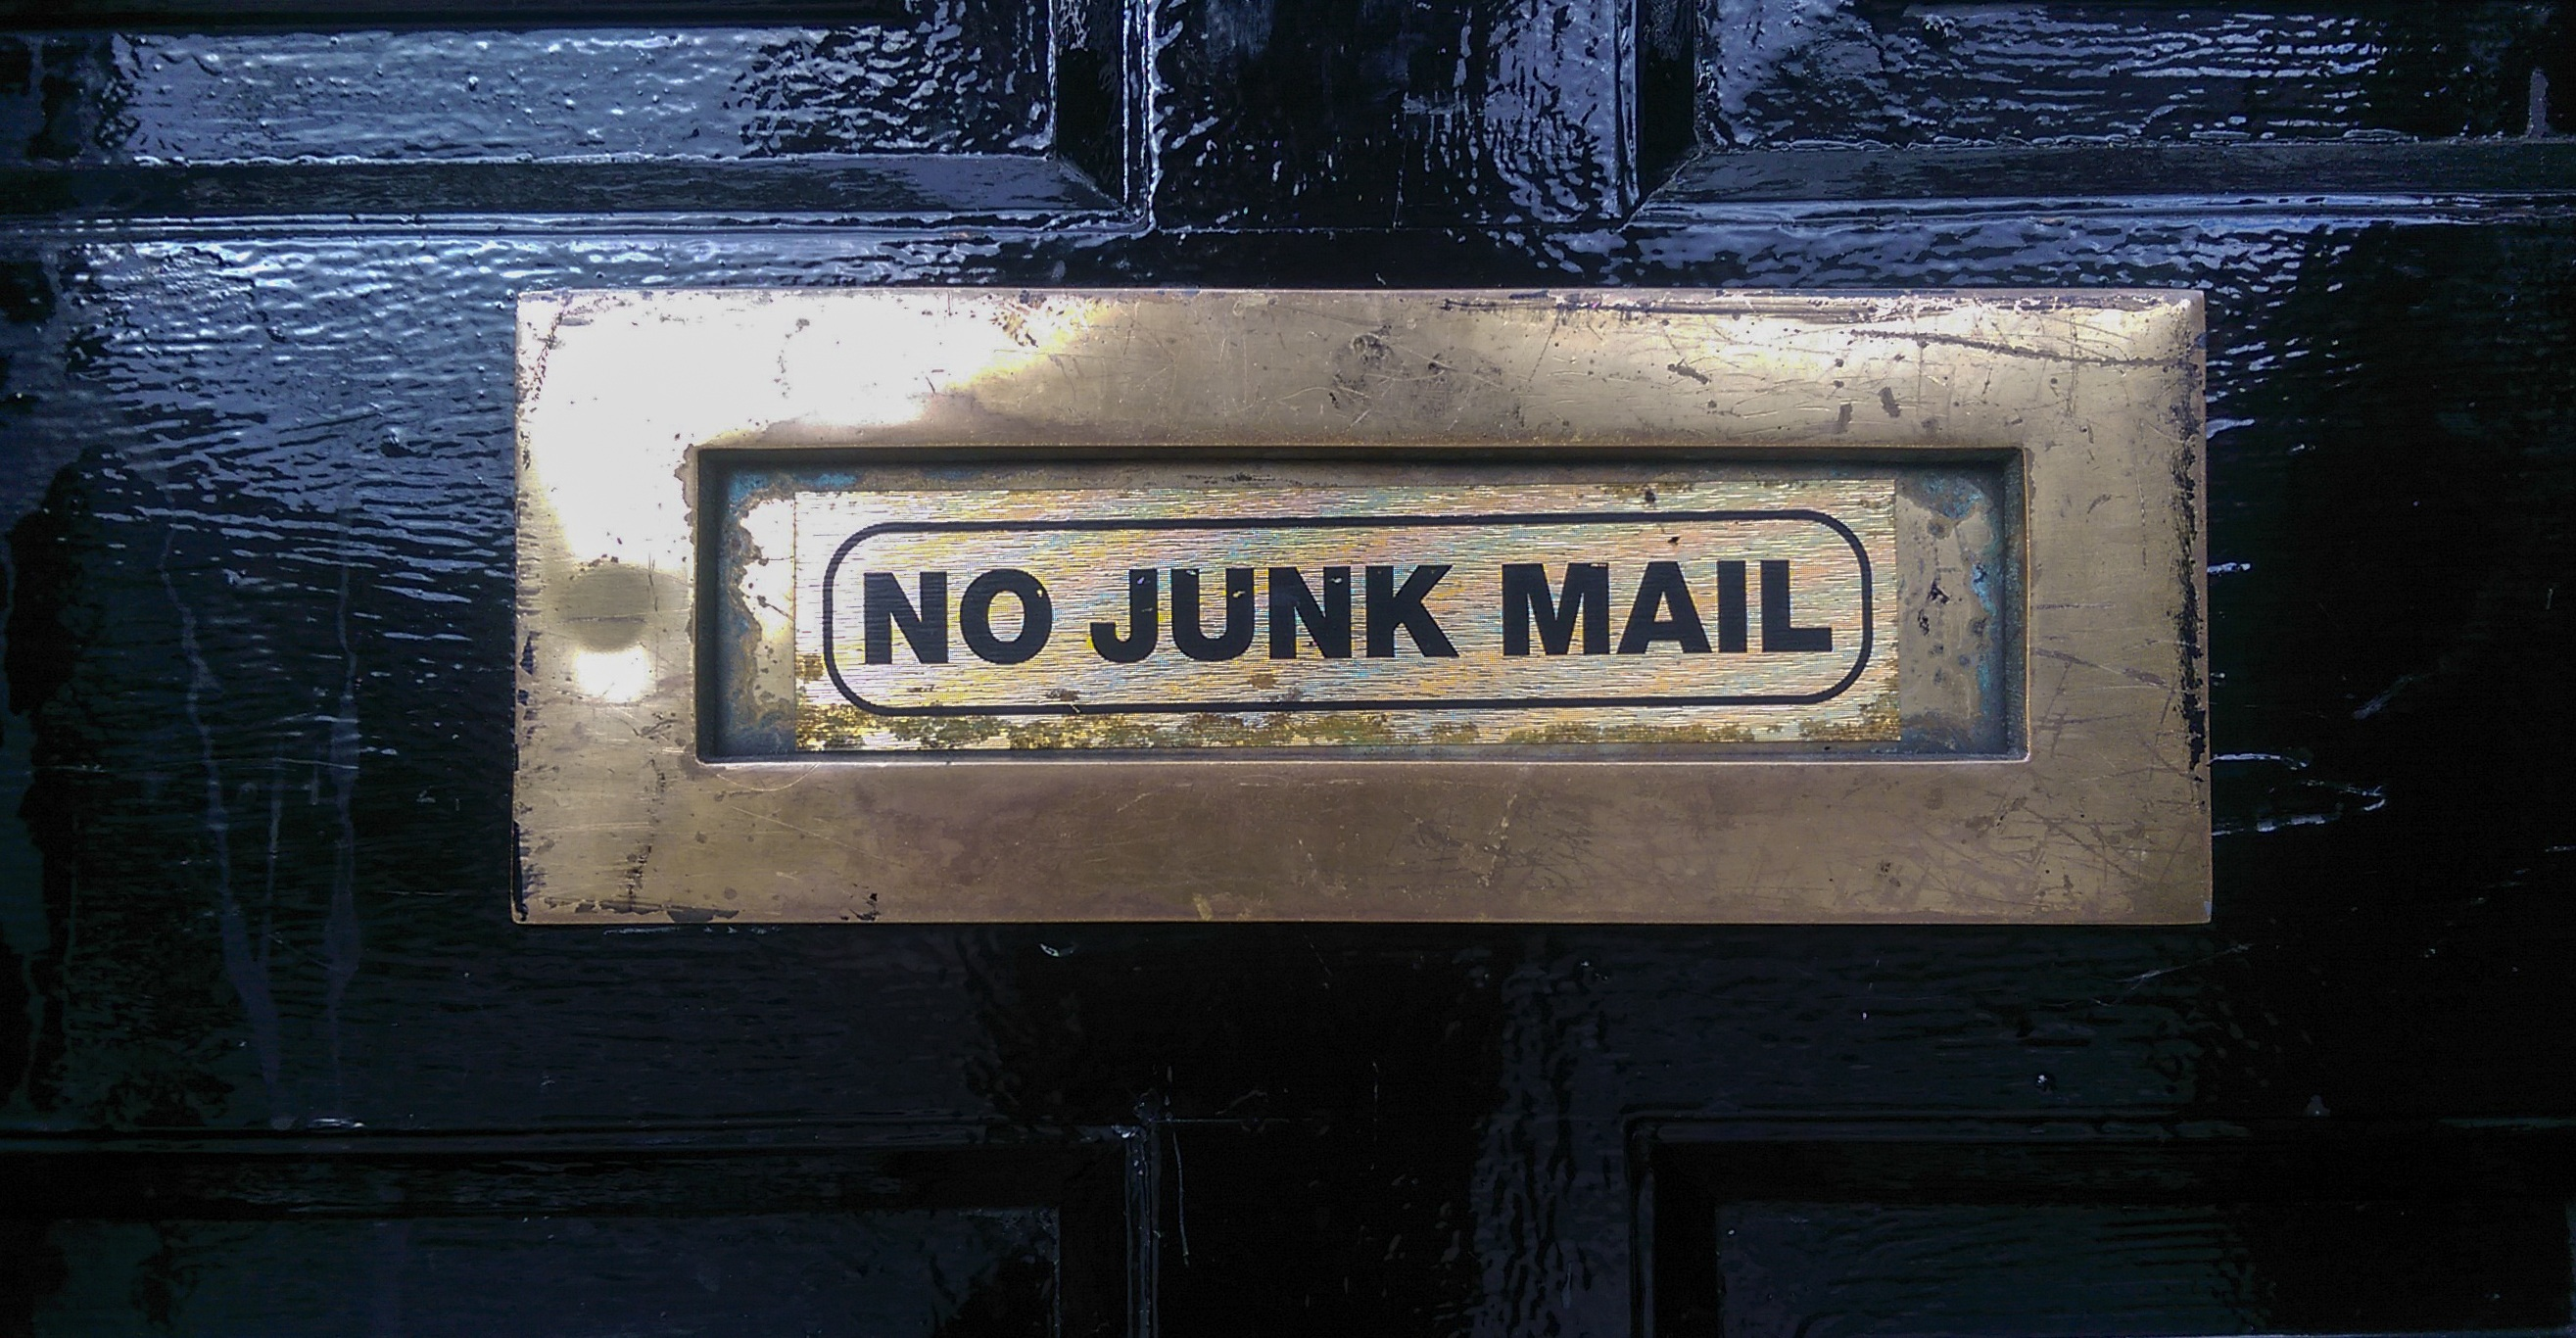

## Table of Contents

1. [Introduction](#Introduction)  
2. [Loading and Exploring the SMS Dataset](#Loading-and-Exploring-the-SMS-Dataset)  
3. [Visualizing the Distribution of Message Types](#Visualizing-the-Distribution-of-Message-Types)  
4. [Data Preprocessing and Feature Engineering](#Data-Preprocessing-and-Feature-Engineering)  
5. [Spam Filter Implementation](#Spam-Filter-Implementation)  
6. [Conclusion](#Conclusion)  

## Introduction  

This project focuses on enhancing email spam classification using the Naive Bayes algorithm. The primary goal is to develop a filter capable of accurately distinguishing between spam and ham (non-spam) messages. Techniques such as Laplace smoothing and word probability calculations are applied to improve the model’s effectiveness in spam detection.  

To achieve this, key probabilities like **P(Spam)** and **P(Ham)** are calculated, along with conditional probabilities for each word's likelihood in spam or ham messages. The Naive Bayes classifier is then implemented and tested on a real-world dataset, with its performance measured by accuracy and analyzed for misclassified messages.  

The final results demonstrate an impressive accuracy rate of **98.39%**, showcasing the effectiveness of the Naive Bayes algorithm in detecting spam. While the model performs exceptionally well, further improvements could involve refining word probability calculations and incorporating additional features to better handle complex messages.  

## Loading and Exploring the SMS Dataset

In [6]:
import pandas as pd
pd.options.display.max_colwidth = 150  # Ensures that long text (like SMS messages) is not truncated in DataFrame displays.

# Load the dataset into a DataFrame. The file uses tab ('\t') as a separator and has no header row.
# Assign custom column names: 'Label' (spam or ham) and 'SMS' (the text of the message).
sms_collection = pd.read_csv(
    "SMSSpamCollection",
    sep="\t",
    header=None,
    names=['Label', 'SMS']
)

def explore(df):
    '''
    Function to explore datasets:
    - Display information about the DataFrame
    - Show the first few rows
    - Provide basic statistics
    - Show the null values for each column
    '''
    print('Data Overview:\n', '='*122, sep='')
    print(df.info())  # Displays the structure of the DataFrame: column types, counts, and memory usage.
    
    print('\nFirst few rows of the dataset:\n', '='*122, sep='')
    display(df.head(10))  # Display 10 rows for a quick glimpse of the dataset structure and content.
    
    print('\nBasic statistics:\n', '='*122, sep='')
    display(df.describe())  # Provides statistics for numeric columns (not relevant here since all data is text).
    
    print('\nNull values:\n', '='*122, sep='')
    print(df.isnull().sum())  # Counts missing values in each column to assess data quality.
         
# Call the explore function to perform initial data inspection.
explore(sms_collection)

Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None

First few rows of the dataset:


,Label,SMS
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 0845281007...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"
5,spam,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv"
6,ham,Even my brother is not like to speak with me. They treat me like aids patent.
7,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your frie...
8,spam,WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 ...
9,spam,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 080...



Basic statistics:


,Label,SMS
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30



Null values:
Label    0
SMS      0
dtype: int64


In [7]:
sms_collection['Label'].value_counts(normalize=True) * 100

Label
ham     86.593683
spam    13.406317
Name: proportion, dtype: float64

## Visualizing the Distribution of Message Types

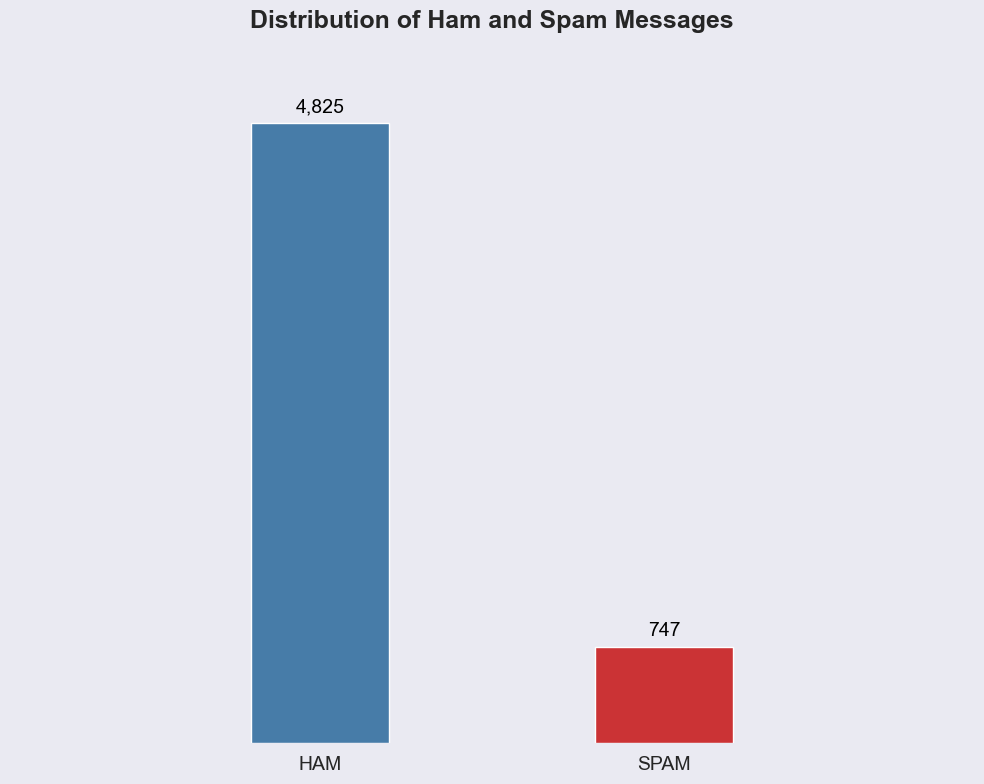

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Set a stylistic theme
sns.set_theme(style='dark')

# Count the occurrences of each label ('ham' and 'spam')
label_counts = sms_collection['Label'].value_counts()

# Create a figure for the bar chart, setting the size and background color
plt.figure(figsize=(10, 8), facecolor='#EAEAF2')

# Create a bar plot for the label distribution
ax = sns.barplot(
    x=label_counts.index.str.upper(),  # x-axis represents the categories (ham and spam)
    y=label_counts.values,             # y-axis represents the corresponding counts
    hue=label_counts.values,           # add color differentiation based on the category
    palette='Set1',                    # use the 'Set1' color palette for the bars
    legend=False,                      # hide the legend as it's not necessary for this plot
    width=0.4                          # Adjust the width of the bars
)

# Add title, remove labels and adjust ticks and limits
plt.title('Distribution of Ham and Spam Messages', fontsize=18, weight='bold')
plt.xlabel('')
plt.xticks(fontsize=14)  # Adjust font size for x-axis labels
plt.yticks([], [])       # Remove the ticks for the y-axis
plt.ylim(0, 5500)        # Adjust the limit for the y-axis for better visibility
ax.margins(x=.5)  

# Add values on top of each bar
for index, value in enumerate(label_counts.values):
    ax.text(index, value + 50,   # Position the text slightly above the bar
            f'{value:,}',        # Format the value with commas for readability
            ha='center',         # Center the text horizontally
            va='bottom',         # Align text to the bottom
            fontsize=14,         # Adjust font size
            color='black')       # Use black for better visibility
    
# Remove grid borders
sns.despine(bottom=True, left=True)

# Display the plot
plt.tight_layout()
plt.show()

## Analysis of the SMS Dataset

---

### Dataset Overview  
- **Entries**: 5,572 messages across 2 columns:  
  - **Label**: Indicates whether a message is `ham` (non-spam) or `spam`.  
  - **SMS**: The text content of the message.  
- **Completeness**: No missing values in either column.  

---

### Unique Values and Top Entries  
- **Label**:  
  - 2 unique values: `ham` and `spam`.  
- **SMS**:  
  - Contains 5,169 unique messages, with some repeated texts.  
  - Most frequent message: `"Sorry, I'll call later"`, appearing 30 times.  

---

### Null Value Check  
- **No null values** in the `Label` or `SMS` columns.  

---

### Distribution of Labels  
- **Ham (non-spam)**:  
  - 4,825 messages (86.59% of the dataset).  
- **Spam**:  
  - 747 messages (13.41% of the dataset).  

## Data Preprocessing and Feature Engineering

In [12]:
# Randomize the dataset
randomized_data = sms_collection.sample(frac=1, random_state=2502)

# Split the dataset into training (80%) and test (20%) sets
train_size = int(0.8 * len(randomized_data))
train_set = randomized_data[:train_size].reset_index(drop=True)
test_set = randomized_data[train_size:].reset_index(drop=True)

# Display the sizes of the training and test sets
print(
    '=' * 58,
    f'\nTraining Set Size: {len(train_set)}\n',
    '=' * 58,
    f'\nTest Set Size: {len(test_set)}\n',
    '=' * 58,
    '\nDistribution of Ham and Spam Messages in the Training Set:\n',
    '-' * 58, '\n',
    round(train_set['Label'].value_counts(normalize=True) * 100, 2), '\n',
    '=' * 58,
    '\nDistribution of Ham and Spam Messages in the Test Set:\n',
    '-' * 58, '\n',
    round(test_set['Label'].value_counts(normalize=True) * 100, 2), '\n',
    '=' * 58,
    sep = ''
)

Training Set Size: 4457
Test Set Size: 1115
Distribution of Ham and Spam Messages in the Training Set:
----------------------------------------------------------
Label
ham     86.63
spam    13.37
Name: proportion, dtype: float64
Distribution of Ham and Spam Messages in the Test Set:
----------------------------------------------------------
Label
ham     86.46
spam    13.54
Name: proportion, dtype: float64


In [13]:
# Remove non-word characters and replace with a single space
train_set['SMS'] = train_set['SMS'].str.replace(r'\W', ' ', regex=True).str.lower()

# Split each message in the SMS column into a list of words
train_set['SMS'] = train_set['SMS'].str.split()

# Initialize an empty list to store words
vocabulary = []

# Iterate over each message in the SMS column
for message in train_set['SMS']:
    # Add each word in the message to the vocabulary list
    for word in message:
        vocabulary.append(word)

# Remove duplicates by transforming the vocabulary list into a set, then back into a list
vocabulary = list(set(vocabulary))

# Display the length and the first few elements of the vocabulary
print(f'Length of \'vocabulary\': {len(vocabulary)}\n')
print(vocabulary[:10])

Length of 'vocabulary': 7789

['inclusive', 'login', 'keralacircle', 'wen', '1956669', 'sigh', 'silent', 'gr8', '08', 'carryin']


In [14]:
# Initialize a dictionary to store word counts for each SMS in the training set
# Each key is a unique word from the vocabulary, and the value is a list of zeros
# The length of each list is equal to the number of messages in the training set
word_counts_per_sms = {unique_word: [0] * len(train_set['SMS']) for unique_word in vocabulary}

# Loop through the training set's SMS column using enumerate() to access both index and message
for index, sms in enumerate(train_set['SMS']):
    # Loop through each word in the current message
    for word in sms:
        # Increment the count of the word at the current message's index in the dictionary
        word_counts_per_sms[word][index] += 1

# Convert the word_counts_per_sms dictionary into a DataFrame
# Each column represents a word, and each row represents a message
word_counts = pd.DataFrame(word_counts_per_sms)

# Concatenate the original training set DataFrame with the new word counts DataFrame along columns
# This ensures the resulting DataFrame contains the original label and SMS columns, along with word counts
train_set_clean = pd.concat([train_set, word_counts], axis=1)

# Display the first few rows of the cleaned training set with word counts
train_set_clean.head()

,Label,SMS,inclusive,login,keralacircle,wen,1956669,sigh,silent,gr8,...,canada,cuz,guess,incredible,tescos,dippeditinadew,hv,rings,tease,stressful
0,ham,"[i, have, a, sore, throat, it, s, scratches, when, i, talk]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ham,"[what, s, the, significance]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ham,"[wiskey, brandy, rum, gin, beer, vodka, scotch, shampain, wine, kudi, yarasu, dhina, vaazhthukkal]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ham,"[i, can, make, it, up, there, squeezed, lt, gt, bucks, out, of, my, dad]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ham,"[u, calling, me, right, call, my, hand, phone]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Data Preprocessing and Feature Engineering for SMS Spam Classification  

This section outlines the key preprocessing steps taken to prepare the data for building a spam classifier. These steps ensure the dataset is clean, structured, and ready for analysis.  

---

### 1. Splitting the Dataset into Training and Test Sets  

**What we did**:  
- Randomized the dataset to evenly distribute spam and ham messages.  
- Split the dataset into **80% training data** and **20% test data**.  
- Reset the indices for both sets to ensure sequential order.  

**Why we did this**:  
- The training set is used for model building, while the test set evaluates the model on unseen data.  
- Randomization ensures an unbiased split, with balanced representation of spam and ham messages.  

---

### 2. Cleaning SMS Messages and Generating the Vocabulary  

**What we did**:  
- Cleaned SMS messages by:  
  - Removing punctuation.  
  - Converting all text to lowercase for consistency.  
- Transformed each message into a list of words by splitting the text at spaces.  
- Created a **vocabulary** of unique words from the training set using the `set()` function.  

**Why we did this**:  
- Cleaning and standardizing the text reduces noise and ensures consistency.  
- Generating a vocabulary provides the foundation for feature engineering, enabling us to define predictors (features) for the model.  

---

### 3. Generating the `word_counts_per_sms` Dictionary and the `train_set_clean` DataFrame  

**What we did**:  
- Created `word_counts_per_sms`, a dictionary where:  
  - Keys are words from the vocabulary.  
  - Values are lists of zeros, representing the number of messages in the training set.  
- Updated the dictionary to store the frequency of each word in every SMS message.  
- Converted the dictionary into a DataFrame, with words as columns and rows representing messages.  
- Merged the word counts DataFrame with the training set to create `train_set_clean`, which includes both the original columns (`Label` and `SMS`) and the new word frequency features.  

**Why we did this**:  
- Word counts represent the frequency of each word in every SMS, transforming text data into numerical features.  
- The resulting DataFrame provides a structured dataset required for machine learning algorithms.  

---

### Summary  

These preprocessing steps established a solid foundation for building a spam detection model. By splitting the dataset, cleaning text, and converting messages into numerical data, we ensured the model has clean, unbiased inputs and relevant features for classification. This preparation is essential for achieving high performance in machine learning tasks.  

## Spam Filter Implementation

In [17]:
# Separate the spam and ham messages
spam_messages = train_set_clean.loc[train_set_clean['Label'] == 'spam']
ham_messages = train_set_clean.loc[train_set_clean['Label'] == 'ham']

# Calculate the number of spam and ham messages
NSpam = len(train_set_clean[train_set_clean['Label'] == 'spam'])  # Number of spam messages
NHam = len(train_set_clean[train_set_clean['Label'] == 'ham'])    # Number of ham messages
NVocabulary = len(vocabulary)  # Number of unique words in the vocabulary

# Calculate P(Spam) and P(Ham)
P_spam = NSpam / len(train_set_clean)  # Probability of a message being spam
P_ham = NHam / len(train_set_clean)    # Probability of a message being ham

# Calculate NSpam and NHam (total number of words in spam and ham messages)
# Using sum directly on the lists avoids creating intermediate lists for efficiency
NSpam_total_words = sum(len(message) for message in spam_messages['SMS'])  # Total words in spam
NHam_total_words = sum(len(message) for message in ham_messages['SMS'])    # Total words in ham

# Define alpha (smoothing parameter)
alpha = 1

# Display the results
print(f"P(Spam): {P_spam}")
print(f"P(Ham): {P_ham}")
print(f"NSpam (total number of words in spam messages): {NSpam_total_words}")
print(f"NHam (total number of words in ham messages): {NHam_total_words}")
print(f"NVocabulary (total unique words): {NVocabulary}")
print(f"Alpha (smoothing factor): {alpha}")

P(Spam): 0.1337222346870092
P(Ham): 0.8662777653129908
NSpam (total number of words in spam messages): 15426
NHam (total number of words in ham messages): 57401
NVocabulary (total unique words): 7789
Alpha (smoothing factor): 1


In [18]:
# Initialize dictionaries for storing probabilities
p_wi_spam = {word: 0 for word in vocabulary}  # P(wi|Spam)
p_wi_ham = {word: 0 for word in vocabulary}   # P(wi|Ham)

# Calculate P(wi|Spam) and P(wi|Ham) for each word
for word in vocabulary:
    # Nwi|Spam: Count of the word in all spam messages
    n_wi_spam = sum(sms.count(word) for sms in spam_messages['SMS'])
    
    # Nwi|Ham: Count of the word in all ham messages
    n_wi_ham = sum(sms.count(word) for sms in ham_messages['SMS'])
    
    # Calculate probabilities with Laplace smoothing
    p_wi_spam[word] = (n_wi_spam + alpha) / (NSpam_total_words + alpha * NVocabulary)
    p_wi_ham[word] = (n_wi_ham + alpha) / (NHam_total_words + alpha * NVocabulary)

# Display results for a few words for verification
print('Example of P(wi|Spam) and P(wi|Ham) for a few words:')
for word in list(vocabulary)[100:105]:  # Displaying probabilities for the first 5 words
    print(f"\nWord: {word}")
    print(f"  P({word}|Spam): {p_wi_spam[word]:.6f}")
    print(f"  P({word}|Ham): {p_wi_ham[word]:.6f}")

Example of P(wi|Spam) and P(wi|Ham) for a few words:

Word: himself
  P(himself|Spam): 0.000043
  P(himself|Ham): 0.000031

Word: petrol
  P(petrol|Spam): 0.000043
  P(petrol|Ham): 0.000061

Word: hahaha
  P(hahaha|Spam): 0.000043
  P(hahaha|Ham): 0.000046

Word: mah
  P(mah|Spam): 0.000043
  P(mah|Ham): 0.000138

Word: ovr
  P(ovr|Spam): 0.000043
  P(ovr|Ham): 0.000031


In [19]:
import re

def classify(message):
    """
    Classify a message as Spam or Ham based on its content.

    Parameters:
    message (str): The input message to classify.

    Returns:
    str: 'spam' if the message is classified as spam, 
         'ham' if classified as ham, or 
         'need human classification' if probabilities are equal.
    """
    # Preprocess the message: clean and tokenize
    words = re.sub(r'\W', ' ', message).lower().split()

    # Initialize probabilities
    p_spam_given_message = P_spam
    p_ham_given_message = P_ham

    # Update probabilities based on the words in the message
    for word in words:
        p_spam_given_message *= p_wi_spam.get(word, 1)  # Default probability is 1 for unknown words
        p_ham_given_message *= p_wi_ham.get(word, 1)    # Default probability is 1 for unknown words
    
    # Determine classification based on probabilities
    if p_ham_given_message > p_spam_given_message:
        return 'ham'
    elif p_ham_given_message < p_spam_given_message:
        return 'spam'
    else:
        return 'need human classification'

# Apply the classification function to the test set
test_set['predicted'] = test_set['SMS'].apply(classify)

# Initialize variables
correct = 0
total = len(test_set)

# Iterate over the DataFrame
for _, row in test_set.iterrows():
    # Increment correct if the actual label matches the predicted label
    if row['Label'] == row['predicted']:
        correct += 1

# Calculate accuracy
accuracy = correct / total

# Print the result
print(f"Accuracy of the spam filter: {accuracy:.2%}")

Accuracy of the spam filter: 98.39%


## Spam Filter Implementation Summary  

---

### 1. Calculating Probabilities and Setting the Smoothing Operator  
Key probabilities and counts were calculated to form the foundation for the spam filter:  
- **P(Spam):** Probability of a message being spam.  
- **P(Ham):** Probability of a message being non-spam (ham).  
- **NSpam and NHam:** Total number of words in spam and ham messages, respectively.  
- **Smoothing Operator (α):** A constant added to avoid zero probabilities for words not present in the training data.  

---

### 2. Calculating Word Probabilities for Spam and Ham  
For each unique word in the vocabulary:  
- **P(wi|Spam):** Probability of a word appearing in spam messages.  
- **P(wi|Ham):** Probability of a word appearing in ham messages.  

---

### 3. Building the Spam Filter Classification Function  
The `classify()` function was created to determine whether a message is spam or ham:  
- The function preprocesses the message by tokenizing and normalizing the text.  
- Using Bayes' theorem, it calculates the probabilities of the message being spam or ham.  
- Classification is based on the higher probability between P(Spam|Message) and P(Ham|Message).  

---

### 4. Applying the Filter and Analyzing Results  
- The `classify()` function was applied to all messages in the test dataset.  
- The spam filter achieved an **accuracy of 98.39%**, demonstrating strong performance.  

## Conclusion  

This project focused on improving email spam classification using the Naive Bayes algorithm. By calculating key probabilities for spam and ham messages and applying Laplace smoothing, the model was trained to effectively differentiate between the two categories. The classifier was evaluated on a real-world dataset, with accuracy chosen as the primary performance metric.  

The model achieved an impressive accuracy of **98.39%**, demonstrating strong performance in identifying spam messages. While the results are promising, further enhancements—such as refining word probability calculations or incorporating additional features—could improve accuracy and better address more complex cases.  